# Panda power three bus problem with diagram

In [1]:
import pandapower as pp
import pandapower.plotting as pplot
from pandapower.plotting.plotly import pf_res_plotly

# Create empty net
# https://pandapower.readthedocs.io/en/stable/elements/empty_network.html

net = pp.create_empty_network() 


In [2]:
# https://pandapower.readthedocs.io/en/stable/elements/bus.html
V_nom_kV = 330
V_nom_kV1 = 220


b1 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 1",geodata=(28.762740, -16.518962,)) #Kariba Power Station (Generator Bus)
b2 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 2",geodata=(28.514473, -15.471812,)) #Leopard's Hill (load bus)
b3 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 3",geodata=(28.559142, -15.770055,)) # Kafue Gorge Lower Power plant station (Slack-Bus)
b4 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 4",geodata=(26.022337, -15.770055,)) #itezhi tezhi power plant (Generator Bus)
b5 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 5",geodata=(27.015514, -15.067332,)) #Mumbwa (load bus)
b6 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 6",geodata=(25.293043, -12.291158,)) #Kalumbila (load bus)
b7 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 7",geodata=(28.2414897, -12.8184360,)) #Kitwe substation (load bus)
b8 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 8",geodata=(28.573120, -14.597711,)) # Kabwe stepdown station (load bus)
b9 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 9",geodata=(30.440257, -13.032075,)) # Pensulo (load bus)
b10 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 10",geodata=(27.0264598, -16.9791930)) # Munzuma (Termianal bus)
b11 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 11",geodata=(25.861981, -17.933791,)) # Victoria falls (gen bus)
b12 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 12",geodata=(27.186104, -17.352456)) # Maamba (gen bus)
b13 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 13",geodata=(28.175685, -15.397038)) # Kalundu Substation (Load bus)
b14 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 14",geodata=(28.162115,-15.753212)) # Kafue Substation (Load bus)
b15 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 15",geodata=(28.138773, -15.739191)) # Kafue NORTH Substation (Terminal bus)
b16 = pp.create_bus(net, vn_kv=V_nom_kV, name="Bus 16",geodata=(28.426925, -15.517158)) # LSMFEZ Substation (Generator bus)



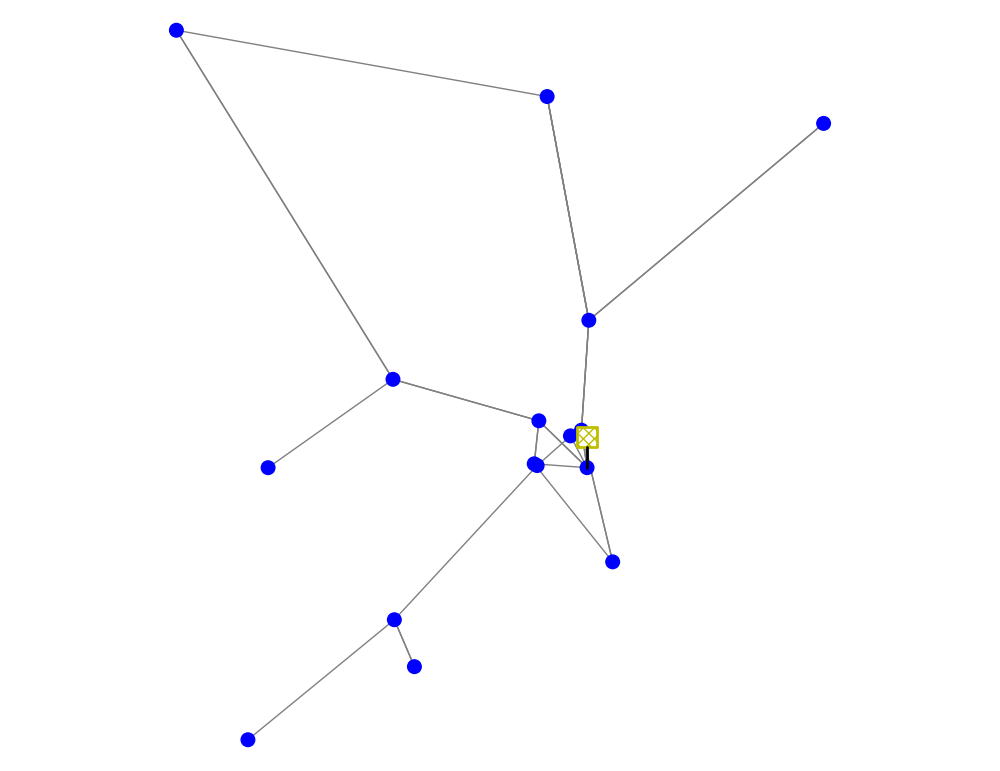

<Axes: >

In [15]:
pplot.simple_plot(net)

In [4]:
###### create bus elements


coefficent = 1.0 # Redundancy coefficient if required (not required given line knowledge)
capacity_factor = 1 # 100% of the capacity is used
solar_capacity_factor = 1 # 20% of the capacity is used
hydro_capacity_factor = 1 # 100% of the capacity is used
coal_capacity_factor = 1 

# BUS 1 - Kariba Power Station
# Create a generator bus
pp.create_gen(net, bus=b1, p_mw=1080 * hydro_capacity_factor, vm_pu=1.0, name="Generator", ) # Kariba Power plant station

# BUS 2 - Leopard's Hill Substation
# Create a load bus, P=199MW which is the demand assigned to Lusaka, Q=110.2 Mvar
# https://pandapower.readthedocs.io/en/stable/elements/load.html

pp.create_load(net, bus=b2, p_mw= 243.37 * coefficent, q_mvar=103.68* coefficent , name="Load") #Leopard

# BUS 3 Kafue Gorge Power Station (Slack-Bus)
# Create a swing bus, V=1.0 py Angle =0  ( using 330 kv as reference voltage)
# Only Ittezhi tezhi power plant has diferent voltage line, 220 kv. This makes V =0.67
# Note: Its called an external grid in PP
# https://pandapower.readthedocs.io/en/stable/elements/ext_grid.html
pp.create_ext_grid(net, bus=b3, vm_pu=1.0, name="Swing bus", min_p_mw=-1740) #at Kafue Power Station

# BUS 4 Itezhi-Tezhi Power Station
pp.create_gen(net, bus=b4, p_mw=120 * hydro_capacity_factor, vm_pu=1.0, name="Generator") # Ittezhi tezhi power plan

# BUS 5 Mumbuwa Substation
pp.create_load(net, bus=b5, p_mw=75.99* coefficent, q_mvar=32.37* coefficent, name="Load") #Mumbwa (load bus)

#Bus 6 Kalumbila Substation
pp.create_load(net, bus=b6, p_mw=715.24* coefficent, q_mvar=304.69* coefficent, name="Load") #Kalumbila (load bus)

#Bus 7 Kitwe substation
pp.create_load(net, bus=b7, p_mw=572.92* coefficent , q_mvar=244.06 * coefficent , name="Load") #Kitwe substation (load bus)

#Bus 8 Kabwe Stepdown Substation
pp.create_load(net, bus=b8, p_mw=32.57 * coefficent , q_mvar=13.08 * coefficent , name="Load") #Kabwe stepdown station (load bus)

#Bus 9 Pensulo Substation
pp.create_load(net, bus=b9, p_mw=289.69* coefficent , q_mvar=123.41 * coefficent , name="Load") #Pensulo (load bus)

#Bus 10 for Munzuma acting as a terminal bus
pp.create_load(net, bus=b10, p_mw=0, q_mvar=0, name="Load") #Muzuma (Terminal bus)

#Bus 11 for Victoria Falls Power Station
pp.create_gen(net, bus=b11, p_mw=108* hydro_capacity_factor , vm_pu=1.0, name="Generator") # Victoria falls (gen bus)

#Bus 12 for Maamba Power Station
pp.create_gen(net, bus=b12, p_mw=300 * coal_capacity_factor , vm_pu=1.0, name="Generator") # Maamba (gen bus)

#Bus 13 Kalundu Substation
pp.create_load(net, bus=b13, p_mw=0, q_mvar=0, name="Load") # Kalundu Substation (Load bus)

#Bus 14 Kafue Substation 
pp.create_load(net, bus=b14, p_mw=0, q_mvar=0, name="Load") # Kafue Substation (Load bus)

#Bus 15 Kafue NORTH Substation acting as a terminal bus
pp.create_load(net, bus=b15, p_mw=0, q_mvar=0, name="Load") # Kafue North Substation (Terminal bus)

#Bus 16 LSMFEZ Substation
pp.create_gen(net, bus=b16, p_mw= 88 * solar_capacity_factor , vm_pu=1.0, name="Generator")  # LSMFEZ Substation (Generator bus) 

net.load


,name,bus,p_mw,q_mvar,const_z_percent,const_i_percent,sn_mva,scaling,in_service,type
0,Load,1,243.37,103.68,0.0,0.0,NaN,1.0,True,wye
1,Load,4,75.99,32.37,0.0,0.0,NaN,1.0,True,wye
2,Load,5,715.24,304.69,0.0,0.0,NaN,1.0,True,wye
3,Load,6,572.92,244.06,0.0,0.0,NaN,1.0,True,wye
4,Load,7,32.57,13.08,0.0,0.0,NaN,1.0,True,wye
5,Load,8,289.69,123.41,0.0,0.0,NaN,1.0,True,wye
6,Load,9,0.00,0.00,0.0,0.0,NaN,1.0,True,wye
7,Load,12,0.00,0.00,0.0,0.0,NaN,1.0,True,wye
8,Load,13,0.00,0.00,0.0,0.0,NaN,1.0,True,wye
9,Load,14,0.00,0.00,0.0,0.0,NaN,1.0,True,wye


In [5]:
P_base = 2222.6 #average hourly demand on the system in 2022 MW (Assumption :NO CHANGE IN GENERATION POOWER IN 2024)
PF = .92 #power factor as per govt sources 
S_base = P_base/PF
print(S_base)

2415.869565217391


In [6]:
## Create lines
#https://pandapower.readthedocs.io/en/stable/elements/line.html
# NOTE: if x,r in PU then set length_km=Z_base to get from PU values to actual values.

# Calculate Z_Base = V/I = V^2/VI
VA_nom_MVA = S_base
Z_base = (V_nom_kV)**2/VA_nom_MVA
print ("Z_base = ",Z_base)

Resistance = 0.09547  # ohm_km
Reactance = 0.234547317  # ohm_km
Capacity = 1 # 1 MVA
Maximum_Current = 0.8 # 0.8 KA


# Bus 1 Kariba to Bus 2 Leopard's Hill Substation Load 
pp.create_line_from_parameters(net,from_bus=b1, to_bus=b2,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b1, to_bus=b2,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Bus 1 Kariba to Bus 15 Kafue NORTH Substation
pp.create_line_from_parameters(net,from_bus=b1, to_bus=b15,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Bus 3 Kafue Power Station to Bus 16 LSMFEZ Substation
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b16,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#  Kafue Power Station to Leopard's Hill Substation
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b2,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b2,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Kafue Power Station to Kalundu Substation
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b13,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b13,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Kafue Power Station to Kafue NORTH Substation
pp.create_line_from_parameters(net,from_bus=b3, to_bus=b15,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Ittezhi tezhi power plant to Mumbwa
pp.create_line_from_parameters(net,from_bus=b4, to_bus=b5,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Mumbwa to Kalumbila
pp.create_line_from_parameters(net,from_bus=b5, to_bus=b6,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b5, to_bus=b6,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

# Kitwe to Kalumbila
pp.create_line_from_parameters(net,from_bus=b7, to_bus=b6,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Kabwe to Kitwe
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b7,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b7,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b7,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b7,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Line 2 - 8 Leopard to Kabwe
pp.create_line_from_parameters(net,from_bus=b2, to_bus=b8,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b2, to_bus=b8,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b2, to_bus=b8,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Line 8 - 9 Kabwe to Pensulo
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b9,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b8, to_bus=b9,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Line 11-10 Victoria falls to Muzuma
pp.create_line_from_parameters(net,from_bus=b11, to_bus=b10,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Line12-10 Maamba to Muzuma
pp.create_line_from_parameters(net,from_bus=b12, to_bus=b10,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b12, to_bus=b10,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)   

# Kalundu to Mumbuwa Substation 
pp.create_line_from_parameters(net,from_bus=b13, to_bus=b5,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b13, to_bus=b5,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Bus 14 Kafue Substation to Bus 15 Kafue NORTH Substation
pp.create_line_from_parameters(net,from_bus=b14, to_bus=b15,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Bus 14 Kafue Substation to Bus 16 LSMFEZ Substation
pp.create_line_from_parameters(net,from_bus=b14, to_bus=b16,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Bus 16 LSMFEZ Substation to Bus B2 Leopard Substation
pp.create_line_from_parameters(net,from_bus=b16, to_bus=b2,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Bus 15 Kafue NORTH Substation to Bus 13 Kalundu Substation
pp.create_line_from_parameters(net,from_bus=b15, to_bus=b13,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)
pp.create_line_from_parameters(net,from_bus=b15, to_bus=b13,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Bus 14 Kafue Substation to Munzuma (Termianal bus)
pp.create_line_from_parameters(net,from_bus=b14, to_bus=b10,length_km=Z_base, r_ohm_per_km = Resistance, x_ohm_per_km = Reactance, c_nf_per_km = Capacity, max_i_ka= Maximum_Current)

#Line xx - yy [UPDATE] Future Generator bus PV to ....


net.line

Z_base =  45.07693692072348


,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,None,0,1,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
1,None,None,0,1,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
2,None,None,0,14,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
3,None,None,2,15,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
4,None,None,2,1,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
5,None,None,2,1,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
6,None,None,2,12,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
7,None,None,2,12,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
8,None,None,2,14,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True
9,None,None,3,4,45.076937,0.09547,0.234547,1.0,0.0,0.8,1.0,1,None,True


In [7]:
net.line_geodata

,coords


In [8]:
# Do a power flow
# https://pandapower.readthedocs.io/en/stable/powerflow/ac.html

pp.runpp(net, algorithm='gs', numba=False);

In [9]:
# Save the network to a json file
# https://pandapower.readthedocs.io/en/stable/file_io.html

pp.to_json(net,"Zambia_network.json")

In [10]:
# View results on the busses
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,1.988840,-1080.000000,-55.271803
1,0.979555,-0.295122,243.370000,103.680000
2,1.000000,0.000000,-320.833708,-596.832193
3,1.000000,-1.990580,-120.000000,-268.052750
4,0.969159,-2.051295,75.990000,32.370000
5,0.938813,-3.541460,715.240000,304.690000
6,0.940245,-2.882150,572.920000,244.060000
7,0.952968,-1.982576,32.570000,13.080000
8,0.940502,-2.727408,289.690000,123.410000
9,0.999093,4.417119,0.000000,0.000000


In [11]:
# View results on the lines
net.res_line

,p_from_mw,q_from_mvar,p_to_mw,q_to_mvar,pl_mw,ql_mvar,i_from_ka,i_to_ka,i_ka,vm_from_pu,va_from_degree,vm_to_pu,va_to_degree,loading_percent
0,421.273591,46.359485,-414.172518,-30.424783,7.101072,15.934702,0.741487,0.741731,0.741731,1.000000,1.988840,0.979555,-0.295122,92.716430
1,421.273591,46.359485,-414.172518,-30.424783,7.101072,15.934702,0.741487,0.741731,0.741731,1.000000,1.988840,0.979555,-0.295122,92.716430
2,237.452818,-37.447167,-235.171492,41.518169,2.281326,4.071001,0.420569,0.420126,0.420569,1.000000,1.988840,0.994479,0.577000,52.571123
3,-81.209898,32.721203,81.514848,-33.514181,0.304951,-0.792978,0.153180,0.154197,0.154197,1.000000,0.000000,1.000000,0.527581,19.274647
4,118.164875,161.855280,-116.567948,-159.442966,1.596928,2.412313,0.350609,0.352765,0.352765,1.000000,0.000000,0.979555,-0.295122,44.095633
5,118.164875,161.855280,-116.567948,-159.442966,1.596928,2.412313,0.350609,0.352765,0.352765,1.000000,0.000000,0.979555,-0.295122,44.095633
6,117.083758,77.960925,-116.297063,-77.551614,0.786695,0.409310,0.246099,0.247586,0.247586,1.000000,0.000000,0.987764,-0.478893,30.948270
7,117.083758,77.960925,-116.297063,-77.551614,0.786695,0.409310,0.246099,0.247586,0.247586,1.000000,0.000000,0.987764,-0.478893,30.948270
8,-68.453661,84.478581,68.926034,-84.851750,0.472373,-0.373169,0.190231,0.192320,0.192320,1.000000,0.000000,0.994479,0.577000,24.040030
9,120.000000,268.052750,-116.575135,-261.134004,3.424865,6.918746,0.513820,0.516245,0.516245,1.000000,-1.990580,0.969159,-2.051295,64.530607


In [12]:
net.bus_geodata

,x,y,coords
0,28.762740,-16.518962,NaN
1,28.514473,-15.471812,NaN
2,28.559142,-15.770055,NaN
3,26.022337,-15.770055,NaN
4,27.015514,-15.067332,NaN
5,25.293043,-12.291158,NaN
6,28.241490,-12.818436,NaN
7,28.573120,-14.597711,NaN
8,30.440257,-13.032075,NaN
9,27.026460,-16.979193,NaN


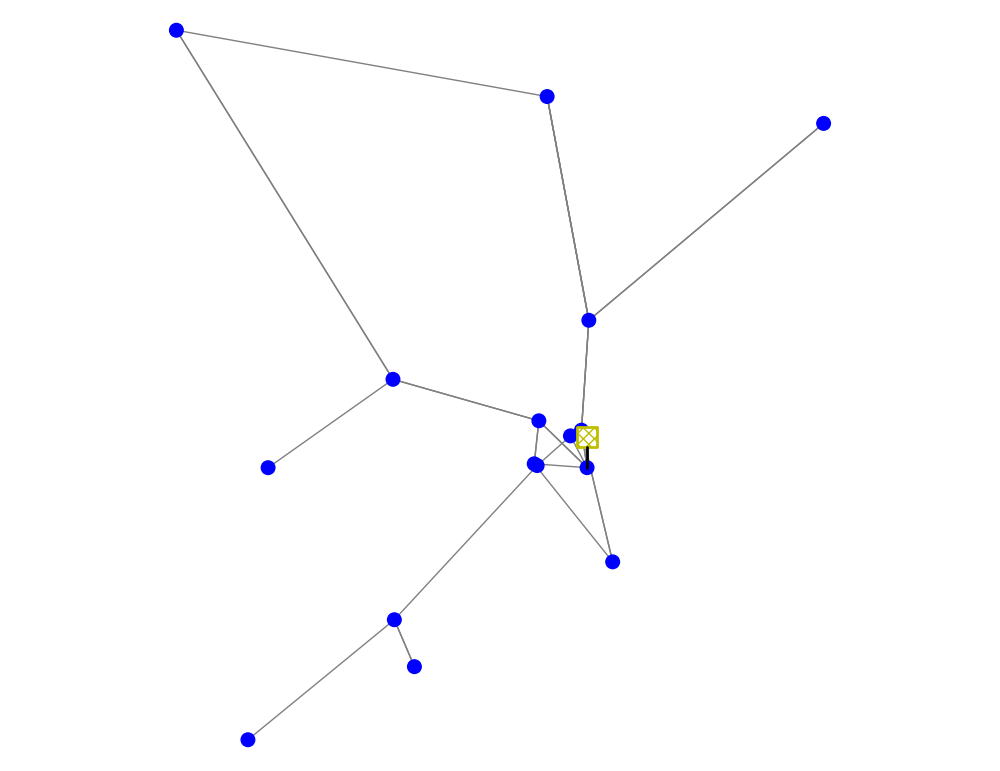

<Axes: >

In [13]:
# Simple plotting
# https://pandapower.readthedocs.io/en/stable/plotting.html
# Also look at https://www.youtube.com/watch?v=O99JNoUytAc

pplot.simple_plot(net)

In [2]:
#from pandapower.plotting.plotly import pf_res_plotly
#pf_res_plotly(net)


NameError: name 'net' is not defined